<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##

#Analizando causalidad utilizando información mutua

##Importando librerías

In [14]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

##Data de Omni web


  FORMAT OF THE SUBSETTED FILE
    
    ITEMS                      FORMAT   
     
 1 Year                          I4        
 2 Day                           I4        
 3 Hour                          I3        
 4 Minute                        I3        
 5 Field magnitude average, nT   F8.2      
 6 BX, nT (GSE, GSM)             F8.2      
 7 BY, nT (GSE)                  F8.2      
 8 BZ, nT (GSE)                  F8.2      
 9 Speed, km/s                   F8.1      
10 Vx Velocity,km/s              F8.1      
11 Vy Velocity, km/s             F8.1      
12 Vz Velocity, km/s             F8.1      
13 Proton Density, n/cc          F7.2      
14 AE-index, nT                  I6  

In [2]:
items=['Year','Day','Hour','Minute','Field magnitude average','BX','BY','BZ','Speed','Vx Velocity','Vy Velocity','Vz Velocity','Proton Density','AE-index']

In [8]:
import pandas as pd

url="https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/omni_min_d5x_t2Qrbj.lst.txt"
df=pd.read_csv(url,delim_whitespace=True,header=None,names=items)

In [9]:
df['date_time'] = pd.to_datetime(df['Year']*1000+df['Day'], format='%Y%j')+pd.Series([pd.Timedelta(hours=x) for x in df['Hour']])+pd.Series([pd.Timedelta(minutes=x) for x in df['Minute']])
print(df['date_time'])

0       2020-11-01 00:00:00
1       2020-11-01 00:01:00
2       2020-11-01 00:02:00
3       2020-11-01 00:03:00
4       2020-11-01 00:04:00
                ...        
43195   2020-11-30 23:55:00
43196   2020-11-30 23:56:00
43197   2020-11-30 23:57:00
43198   2020-11-30 23:58:00
43199   2020-11-30 23:59:00
Name: date_time, Length: 43200, dtype: datetime64[ns]


In [10]:
df.set_index('date_time', inplace=True)

In [11]:
df.head()

,Year,Day,Hour,Minute,Field magnitude average,BX,BY,BZ,Speed,Vx Velocity,Vy Velocity,Vz Velocity,Proton Density,AE-index
date_time,,,,,,,,,,,,,,
2020-11-01 00:00:00,2020,306,0,0,4.24,-3.25,1.95,1.89,372.6,-372.4,-9.1,-5.0,5.48,99999
2020-11-01 00:01:00,2020,306,0,1,4.34,-3.32,2.29,1.60,99999.9,99999.9,99999.9,99999.9,999.99,99999
2020-11-01 00:02:00,2020,306,0,2,4.17,-3.06,2.73,0.72,376.9,-376.1,-21.1,13.5,5.03,99999
2020-11-01 00:03:00,2020,306,0,3,4.22,-3.12,2.71,0.79,376.9,-376.1,-21.1,13.5,5.03,99999
2020-11-01 00:04:00,2020,306,0,4,4.28,-2.95,2.55,1.55,372.6,-372.1,-16.7,9.3,5.48,99999


In [12]:
df.describe

<bound method NDFrame.describe of                      Year  Day  Hour  ...  Vz Velocity  Proton Density  AE-index
date_time                             ...                                       
2020-11-01 00:00:00  2020  306     0  ...         -5.0            5.48     99999
2020-11-01 00:01:00  2020  306     0  ...      99999.9          999.99     99999
2020-11-01 00:02:00  2020  306     0  ...         13.5            5.03     99999
2020-11-01 00:03:00  2020  306     0  ...         13.5            5.03     99999
2020-11-01 00:04:00  2020  306     0  ...          9.3            5.48     99999
...                   ...  ...   ...  ...          ...             ...       ...
2020-11-30 23:55:00  2020  335    23  ...        -18.2            0.79     99999
2020-11-30 23:56:00  2020  335    23  ...         -5.8            0.84     99999
2020-11-30 23:57:00  2020  335    23  ...        -14.2            0.84     99999
2020-11-30 23:58:00  2020  335    23  ...        -15.3            0.84     

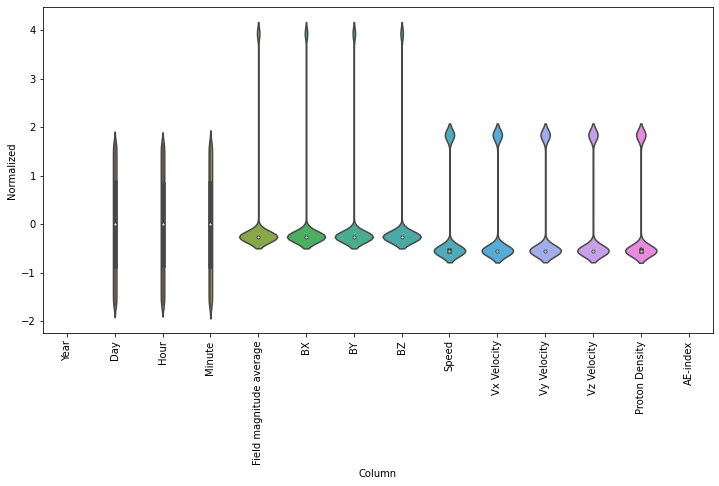

In [15]:
df_std = (df - df.mean()) / df.std()
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Analizando estacionalidad (Seasonality)

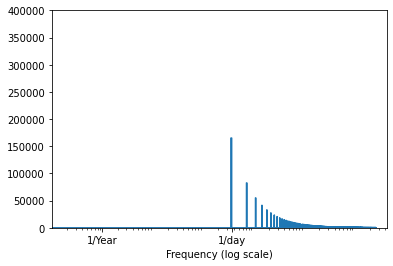

In [20]:
#Este cpodigo aún debe ser adaptdo, en este punto existen "n" muestras para cada observación, además "n" es variable
fft = tf.signal.rfft(df['Hour'])
f_per_dataset = np.arange(0, len(fft))

n_samples_5min = len(df['Hour'])
hours_per_year = 24*365.2524*60
years_per_dataset = n_samples_5min/(hours_per_year)


f_per_year = f_per_dataset/years_per_dataset



plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

##Data de S4 de LISN

In [29]:
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/gfajardo_uNz2xU-2020-2.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [30]:
s4['date_time'] = pd.to_datetime(s4['Año']*1000+s4['Day'], format='%y%j')+pd.Series([pd.Timedelta(seconds=x) for x in s4['Tiempo']])
print(s4['date_time'])
s4=s4.drop(['Año',	'Day',	'Tiempo'], axis=1)
s4.head()

0        2020-11-01 00:00:22
1        2020-11-01 00:00:22
2        2020-11-01 00:00:22
3        2020-11-01 00:00:22
4        2020-11-01 00:00:22
                 ...        
452982   2020-12-02 23:45:40
452983   2020-12-02 23:45:40
452984   2020-12-02 23:45:40
452985   2020-12-02 23:45:40
452986   2020-12-02 23:45:40
Name: date_time, Length: 452987, dtype: datetime64[ns]


,PRN,S4,Az,Elv,date_time
0,3,0.10,300.9,24.6,2020-11-01 00:00:22
1,8,0.05,199.5,47.2,2020-11-01 00:00:22
2,10,0.40,147.1,14.3,2020-11-01 00:00:22
3,11,0.08,210.6,26.2,2020-11-01 00:00:22
4,16,0.04,342.4,42.3,2020-11-01 00:00:22


In [31]:
#print(df)

s4=s4[s4['Elv']>30]
s4.describe()

,PRN,S4,Az,Elv
count,272281.000000,272281.000000,272281.000000,272281.000000
mean,36.695329,0.057438,198.923780,48.655690
std,46.124304,0.024913,95.969254,12.304419
min,1.000000,0.020000,0.000000,30.100000
25%,9.000000,0.040000,127.700000,38.300000
50%,21.000000,0.050000,200.600000,49.700000
75%,29.000000,0.070000,288.400000,54.600000
max,138.000000,0.830000,360.000000,89.000000


In [32]:
s4.set_index('date_time', inplace=True)
s4.resample("1min").mean()

,PRN,S4,Az,Elv
date_time,,,,
2020-11-01 00:00:00,37.714286,0.048571,222.242857,46.328571
2020-11-01 00:01:00,37.714286,0.051429,222.000000,46.400000
2020-11-01 00:02:00,37.714286,0.052857,221.757143,46.471429
2020-11-01 00:03:00,37.714286,0.047143,221.514286,46.542857
2020-11-01 00:04:00,37.714286,0.051429,221.257143,46.614286
...,...,...,...,...
2020-12-02 23:41:00,28.000000,0.052500,224.312500,46.325000
2020-12-02 23:42:00,28.000000,0.062500,224.075000,46.312500
2020-12-02 23:43:00,28.000000,0.063750,223.800000,46.312500


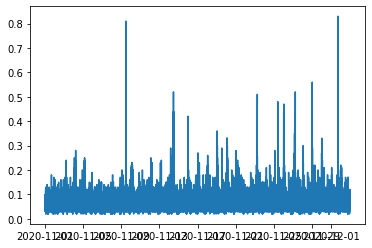

In [33]:
plt.plot(s4['S4'])

In [44]:
s4

,PRN,S4,Az,Elv
date_time,,,,
2020-11-01 00:00:22,8,0.05,199.5,47.2
2020-11-01 00:00:22,16,0.04,342.4,42.3
2020-11-01 00:00:22,21,0.07,205.5,30.1
2020-11-01 00:00:22,22,0.06,282.5,40.4
2020-11-01 00:00:22,27,0.03,134.2,71.7
...,...,...,...,...
2020-12-02 23:45:40,8,0.03,348.4,71.6
2020-12-02 23:45:40,21,0.05,159.0,48.7
2020-12-02 23:45:40,22,0.08,206.3,42.2


##Uniendo data

In [46]:
merge=pd.merge_asof(s4,df,right_index=True,left_index=True)

In [47]:
merge.head()

,PRN,S4,Az,Elv,Year,Day,Hour,Minute,Field magnitude average,BX,BY,BZ,Speed,Vx Velocity,Vy Velocity,Vz Velocity,Proton Density,AE-index
date_time,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:22,8,0.05,199.5,47.2,2020,306,0,0,4.24,-3.25,1.95,1.89,372.6,-372.4,-9.1,-5.0,5.48,99999
2020-11-01 00:00:22,16,0.04,342.4,42.3,2020,306,0,0,4.24,-3.25,1.95,1.89,372.6,-372.4,-9.1,-5.0,5.48,99999
2020-11-01 00:00:22,21,0.07,205.5,30.1,2020,306,0,0,4.24,-3.25,1.95,1.89,372.6,-372.4,-9.1,-5.0,5.48,99999
2020-11-01 00:00:22,22,0.06,282.5,40.4,2020,306,0,0,4.24,-3.25,1.95,1.89,372.6,-372.4,-9.1,-5.0,5.48,99999
2020-11-01 00:00:22,27,0.03,134.2,71.7,2020,306,0,0,4.24,-3.25,1.95,1.89,372.6,-372.4,-9.1,-5.0,5.48,99999


##Evaluando causalidad

Crearemos una función para evaluar causalidad, usando Informaci{on mutua retrasada, para ello, la función nos devuelve el dataframe original recortado y el dataframe nuevo.

In [49]:
def recorte(df,time_delay):
  #time_delay. Es el retraso en pasos (términos de la frecuencia de muestreo), en tiempo real sería= time_delay*frecuencia de muestreo
  #df es el dataset orginal
  return df[:len(df)-time_delay],df[time_delay:]

In [53]:
a=recorte(merge,15)

x=a[0][a[0].columns[4:10]]
y1=a[1]['11']

#print(a[0][a[0].columns[4:10]])
print(a[0])
print(a[1])

KeyError: ignored

In [71]:
import sklearn
from sklearn import metrics
import numpy as np

vector=np.arange(0, 600, 1)
print(vector)
vector_mi=[]
vector_co=[]
#indice_entrada='Field magnitude average'
indice_entrada='Speed'
indice_salida='S4'
def mutual_information_along_vector(df,vector,indice_entrada,indice_salida):
  for i in vector:
    a=recorte(merge,i)
    x=a[0][indice_entrada]
    y1=a[1][indice_salida]
    mi=sklearn.metrics.mutual_info_score(y1,x)
    r = np.corrcoef(x, y1)
    vector_mi.append(mi)
    vector_co.append(r[1,0])
  return np.transpose(vector_mi),np.transpose(vector_co) 
vector_mi=mutual_information_along_vector(df,vector,indice_entrada,indice_salida)
#print(mi)
#print(r)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

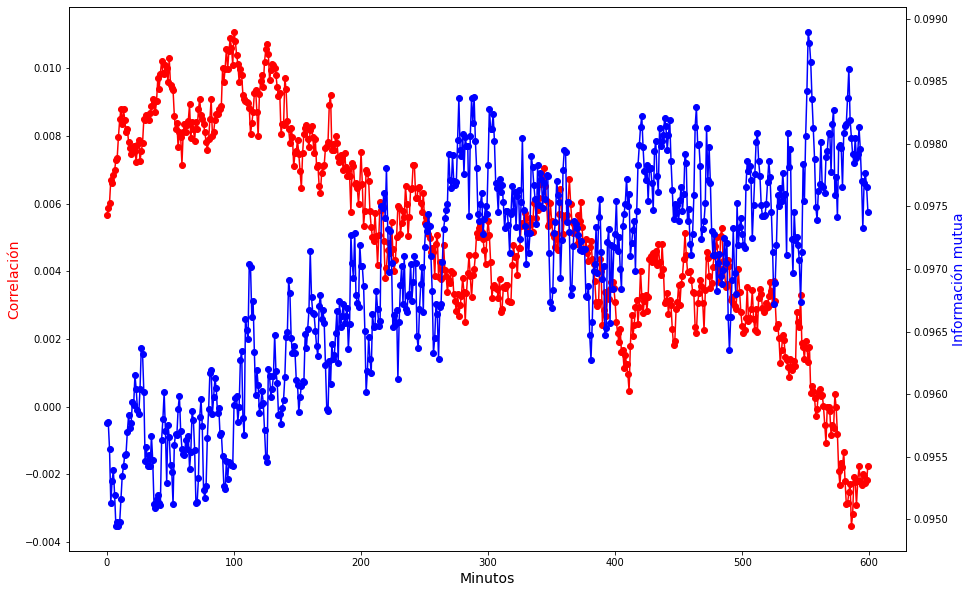

In [75]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 10))
# make a plot
ax.plot(vector,vector_mi[1], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Minutos",fontsize=14)
# set y-axis label
ax.set_ylabel("Correlación",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(vector,vector_mi[0],color="blue",marker="o")
ax2.set_ylabel("Información mutua",color="blue",fontsize=14)



plt.show()


[1.13614367e-05 1.00174544e+00 5.78679497e-09 9.62516938e-02]


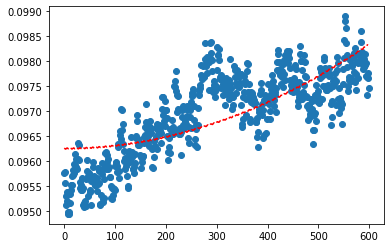

In [74]:
# fit a line to the economic data
from numpy import sin
from numpy import sqrt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d):
 return a * sin(b - x) + c * x**2 + d
 

# choose the input and output variables
x, y = vector,vector_mi[0]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d = popt
print(popt)
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [ ]:
df[1]

0        306
1        306
2        306
3        306
4        306
        ... 
43195    335
43196    335
43197    335
43198    335
43199    335
Name: 1, Length: 43200, dtype: int64